<a href="https://colab.research.google.com/github/haakonnese/tdt-4173-revenue/blob/main/src/models/H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [23]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 5 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_oauoxd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.956 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/haakonnese/tdt-4173-revenue/main/own_data/all_with_stores_pop.csv?token=GHSAT0AAAAAABYAXXBKAKQVJH5K5Q2AEVDYY2Y5ZCQ").set_index(["dataset", "range_index"])
#df["latlon"] = np.round(df["lat"], decimals = 4).astype(str) + "-" + np.round(df["lon"], decimals = 4).astype(str)
df.drop(columns=['store_name', 'address', 'lat', 'lon', 'busstop_id', 'importance_level', 'stopplace_type', 'grunnkrets_id'], inplace=True)
df['in_mall'] = df['mall_name'].notna()
df['in_chain'] = df['chain_name'].notna()
# df['stopplace_type'] = df['stopplace_type'].fillna("Mangler type")
df['mall_name'] = df['mall_name'].fillna("None")
#df['address'] = df['address'].fillna("None")
#df['stopplace_type'] = df['stopplace_type'].fillna("None")

df['chain_name'] = df['chain_name'].fillna("None")
# df['busstop_id'] = df['busstop_id'].map(str)
df['lv1'] = df['lv1'].map(str)
df['lv2'] = df['lv2'].map(str)
df['lv3'] = df['lv3'].map(str)
df['lv4'] = df['lv4'].map(str)
df['lv1'] = df['lv1'] + "cat"
df['lv2'] = df['lv2'] + "cat"
df['lv3'] = df['lv3'] + "cat"
df['lv4'] = df['lv4'] + "cat"

data_with_label = df.loc["train"]
data_with_label.set_index('store_id', inplace=True)

X, y = data_with_label.loc[:, data_with_label.columns != 'revenue'], data_with_label['revenue']

# Numeric feature selection
# print(X.shape)
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[np.object0]).columns
# X = X[categorical_features].join(X[['singles_y', 'grunnkrets_population', 'municipality_density',
#  'district_density', 'lv1_population_district_div_count_stores',
#  'lv3_population_district_div_count_stores',
#  'lv4_population_district_div_count_stores',
#  'lv1_population_municipality_div_count_stores',
#  'lv2_population_municipality_div_count_stores',
#  'lv3_population_municipality_div_count_stores']])

# # Combining categories
# for cat_name in categorical_features:
#     series = X[cat_name].value_counts()
#     mask = (series/series.sum() * 100).lt(.05)
#     # To replace df['column'] use np.where I.e 
#     X[cat_name] = np.where(X[cat_name].isin(series[mask].index),'Other',X[cat_name])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
y_train_log = np.log1p(y_train)
y_log = np.log1p(y)

HTTPError: ignored

In [25]:
df

store_id chain_name          mall_name  \
dataset range_index                                                             
train   0             983540538-974187930-44774  MCDONALDS  Magasinet Drammen   
        100          916139195-998469740-540508       None               None   
extra   8473           911734907--694347-694347       None               None   
        8490             911734907--65648-65648       None               None   
train   127          999512895-999558380-491766   CONSELTO               None   
...                                         ...        ...                ...   
test    4134          937628668-972044857-47364       None               None   
train   6207          966538279-973502220-35549       None               None   
test    4138          952390821-971994908-26248       None               None   
extra   7819         958303955-972227331-205067       None               None   
train   11627        975807371-975825639-390482       None               None   

                     revenue  other_stores_1000  other_stores_100  \
dataset range_index                                                 
train   0             17.998                429                29   
        100            3.814                436                28   
extra   8473             NaN                405                15   
        8490             NaN                405                15   
train   127            4.016                434                44   
...                      ...                ...               ...   
test    4134             NaN                 14                 0   
train   6207          14.790                  0                 0   
test    4138             NaN                  5                 0   
extra   7819             NaN                 14                 0   
train   11627         98.935                  0                 0   

                     other_stores_50  other_stores_250  buss_stops_1000  \
dataset range_index                                                       
train   0                          5               183               21   
        100                       10               186               19   
extra   8473                       7               112               19   
        8490                       7               112               19   
train   127                       10               186               19   
...                              ...               ...              ...   
test    4134                       0                 1               20   
train   6207                       0                 0                2   
test    4138                       0                 0                9   
extra   7819                       0                 0                9   
train   11627                      0                 0                8   

                     buss_stops_300  ...  \
dataset range_index                  ...   
train   0                         0  ...   
        100                       0  ...   
extra   8473                      0  ...   
        8490                      0  ...   
train   127                       0  ...   
...                             ...  ...   
test    4134                      3  ...   
train   6207                      1  ...   
test    4138                      0  ...   
extra   7819                      4  ...   
train   11627                     0  ...   

                     lv1_population_district_div_count_stores  \
dataset range_index                                             
train   0                                           65.071429   
        100                                         65.071429   
extra   8473                                        65.071429   
        8490                                        65.071429   
train   127                                         65.071429   
...                                                       ...   
test    4134      

In [6]:
temp = X.merge(y_log, left_index=True, right_index=True)

In [7]:
hf = h2o.H2OFrame(temp)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf

chain_name,mall_name,district_name,municipality_name,lv1,lv2,lv3,lv4,side_placement,singles_y,grunnkrets_population,municipality_density,district_density,lv1_population_district_div_count_stores,lv3_population_district_div_count_stores,lv4_population_district_div_count_stores,lv1_population_municipality_div_count_stores,lv2_population_municipality_div_count_stores,lv3_population_municipality_div_count_stores,revenue
Other,Magasinet Drammen,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.1cat,1.1.1.0cat,RIGHT,277500,157,1586.35,3253.73,65.0714,4555,4555,395.55,554.418,22546.3,2.94433
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.2cat,1.1.2.0cat,RIGHT,277500,157,1586.35,3253.73,65.0714,1518.33,1518.33,395.55,554.418,11273.2,1.57153
Other,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.3cat,1.1.3.0cat,RIGHT,277500,157,1586.35,3253.73,65.0714,2277.5,2277.5,395.55,554.418,22546.3,1.61263
Other,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.5cat,1.1.5.0cat,RIGHT,277500,157,1586.35,3253.73,65.0714,1138.75,1138.75,395.55,554.418,7515.44,2.95408
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.5cat,1.1.5.0cat,RIGHT,277500,268,1586.35,3253.73,65.0714,1138.75,1138.75,395.55,554.418,7515.44,2.87998
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.6cat,1.1.6.2cat,RIGHT,277500,157,1586.35,3253.73,65.0714,198.043,414.091,395.55,554.418,1252.57,3.3898
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.6cat,1.1.6.2cat,RIGHT,277500,268,1586.35,3253.73,65.0714,198.043,414.091,395.55,554.418,1252.57,1.83769
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.6cat,1.1.6.2cat,RIGHT,277500,268,1586.35,3253.73,65.0714,198.043,414.091,395.55,554.418,1252.57,2.86466
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.6cat,1.1.6.2cat,RIGHT,277500,268,1586.35,3253.73,65.0714,198.043,414.091,395.55,554.418,1252.57,1.01993
None,None,Bragernes sentrum,Drammen,1cat,1.1cat,1.1.6cat,1.1.6.3cat,RIGHT,277500,157,1586.35,3253.73,65.0714,198.043,1138.75,395.55,554.418,1252.57,2.51576


In [8]:
categorical_features = categorical_features.to_list()

In [ ]:
categorical_features

['chain_name',
 'mall_name',
 'district_name',
 'municipality_name',
 'lv1',
 'lv2',
 'lv3',
 'lv4',
 'side_placement']

In [9]:
hf[categorical_features] = hf[categorical_features].asfactor()
#train[categorical_features] = train[categorical_features].asfactor()
#test[categorical_features] = test[categorical_features].asfactor()

In [10]:
y = "revenue"
x = hf.columns
x.remove(y)

In [39]:
aml = H2OAutoML(max_runtime_secs=9000, max_models=30, seed=1)
aml.train(x = x, y = y, training_frame=hf)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.544596,0.0125980,0.5582105,0.5420604,0.5254382,0.5532938,0.5439772
mean_residual_deviance,0.5160130,0.0246866,0.5416174,0.5064709,0.4794890,0.5348386,0.5176489
mse,0.5160130,0.0246866,0.5416174,0.5064709,0.4794890,0.5348386,0.5176489
null_deviance,2697.233,120.9702450,2748.6602,2772.4395,2531.601,2821.7083,2611.7554
r2,0.5087712,0.0161959,0.484717,0.5284363,0.5036248,0.5110941,0.5159841
residual_deviance,1323.8643,71.420364,1416.3296,1306.695,1253.3842,1378.8138,1264.0985
rmse,0.7181741,0.0172811,0.7359467,0.7116677,0.6924514,0.7313266,0.7194782
rmsle,0.3140379,0.0044134,0.3190948,0.3141034,0.3073888,0.3166665,0.3129359


In [40]:
lb = aml.leaderboard

In [41]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_4_20221026_105835,0.718314,0.515975,0.544404,0.314029,0.515975
StackedEnsemble_BestOfFamily_1_AutoML_4_20221026_105835,0.720018,0.518426,0.545952,0.31465,0.518426
GBM_grid_1_AutoML_4_20221026_105835_model_3,0.735574,0.54107,0.560584,0.320151,0.54107
GBM_grid_1_AutoML_4_20221026_105835_model_2,0.736204,0.541997,0.56014,0.320403,0.541997
DeepLearning_grid_1_AutoML_4_20221026_105835_model_1,0.737248,0.543535,0.556996,0.320198,0.543535
DeepLearning_grid_1_AutoML_4_20221026_105835_model_2,0.738167,0.54489,0.562427,nan,0.54489
DeepLearning_grid_3_AutoML_4_20221026_105835_model_1,0.739448,0.546783,0.56099,0.320152,0.546783
XGBoost_grid_1_AutoML_4_20221026_105835_model_3,0.740703,0.54864,0.563565,0.321141,0.54864
GLM_1_AutoML_4_20221026_105835,0.740958,0.549019,0.568445,0.32186,0.549019
XGBoost_3_AutoML_4_20221026_105835,0.742184,0.550837,0.565501,0.321551,0.550837


In [42]:
test = df.loc["test"]
test.drop(columns="revenue", inplace=True)
test.set_index('store_id', inplace=True)

hf_test = h2o.H2OFrame(test)
hf_test[categorical_features] = hf_test[categorical_features].asfactor()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [43]:
preds = aml.predict(hf_test)
preds = preds.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'chain_name' has levels not trained on: ["24 7 TRENINGSSENTER", "ACE SHOPS", "AVANCIA SPORT", "BADEMILJØ", "BADERINGEN", "BAROKK FRISØR", "BERTONI NORWAY", "BIRK SPORT", "BLUE ENERGY", "DESINESS", ...23 not listed..., "SALT OG PEPPER HØNEFOSS", "SKOGSTAD DETALJ", "SKY FITNESS", "TIGER OF SWEDEN", "TIPPY", "VARMEFAG INVEST", "VITA EXCLUSIVE", "YOGIS", "ZAVANNA", "ZAXIZ FRISØR"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'mall_name' has levels not trained on: ["Aamodt Senter", "Bardufoss Torgsenter", "Bellevuesenteret", "Borgeåsen Senter", "CC Mart'n", "Combisenteret Fiskå", "Coop Mega Hønefoss", "Coop Mega Øvre Årdal", "Cuben Kjøpesenter", "De Syv Søstre kjøpesenter", ...37 not listed..., "Strøget", "Sundt Motehus", "Svelvik Nærsenter", "Tebo Senter", "Trekanten Senter Kristiansand", "Tårnhuset", "Varehuset Rosendal",

In [44]:
preds.index = test.index
preds.index.name = "id"
preds.rename(columns={"predict": "predicted"}, inplace=True)
preds["predicted"] = np.expm1(preds["predicted"])
preds

,predicted
id,
884875072-975988988-41051,6.701885
999235174-999504078-507807,6.638450
916715463-816878292-826266,2.477787
999086284-982563895-99598,3.644598
979879741-972291455-25435,3.222898
...,...
917064016-817211402-838350,2.009934
917353379-917411824-845904,3.617936
917323003-917383529-844309,6.377287


In [45]:
preds.to_csv("2022-10-26-H2O_9000s_max30_models_all_num_and_cat_preprocessing.csv")

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20221026_82824_model_2,0.323673,0.104764,0.225692,0.150998,0.104764,5405,0.005225,XGBoost
DRF_1_AutoML_2_20221026_82824,0.330124,0.108982,0.243718,0.157195,0.108982,38174,0.034079,DRF
XGBoost_1_AutoML_2_20221026_82824,0.383206,0.146847,0.283614,0.178302,0.146847,4413,0.004577,XGBoost
GBM_grid_1_AutoML_2_20221026_82824_model_1,0.42753,0.182782,0.311234,0.199252,0.182782,3704,0.018892,GBM
GBM_4_AutoML_2_20221026_82824,0.472177,0.222951,0.333259,0.219453,0.222951,4091,0.023381,GBM
XGBoost_2_AutoML_2_20221026_82824,0.504455,0.254475,0.381827,0.229529,0.254475,3022,0.003564,XGBoost
XGBoost_grid_1_AutoML_2_20221026_82824_model_1,0.513025,0.263195,0.390676,0.234083,0.263195,2829,0.003402,XGBoost
GBM_3_AutoML_2_20221026_82824,0.530055,0.280958,0.381006,0.243898,0.280958,2833,0.011422,GBM
GBM_2_AutoML_2_20221026_82824,0.546723,0.298906,0.394943,0.249758,0.298906,2473,0.010836,GBM
XRT_1_AutoML_2_20221026_82824,0.54749,0.299746,0.432243,0.246023,0.299746,40007,0.040251,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

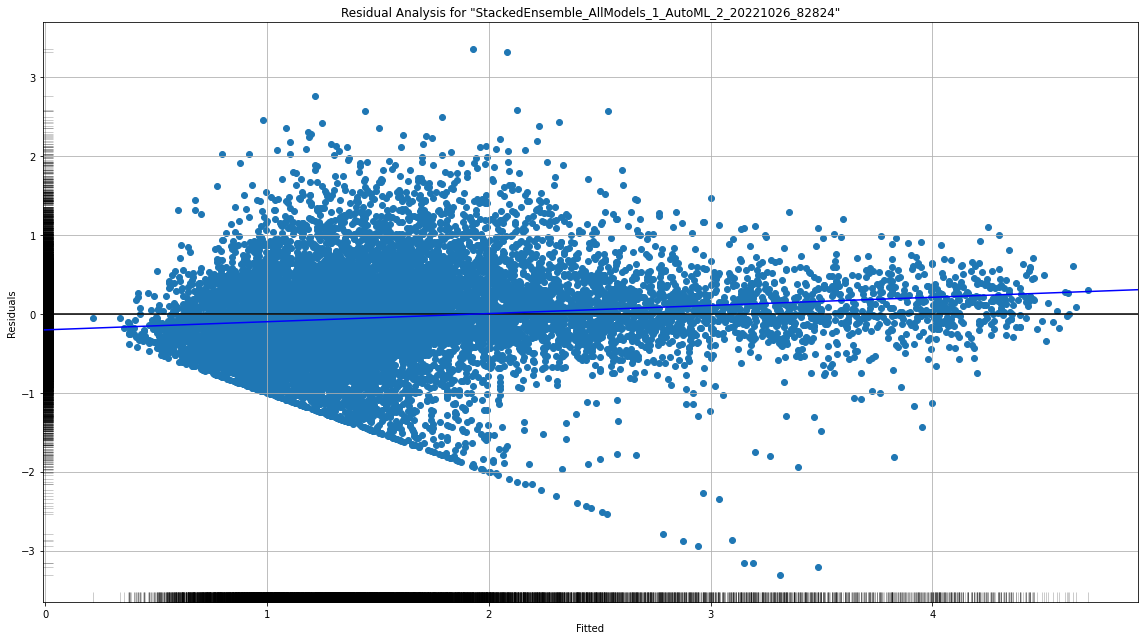

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

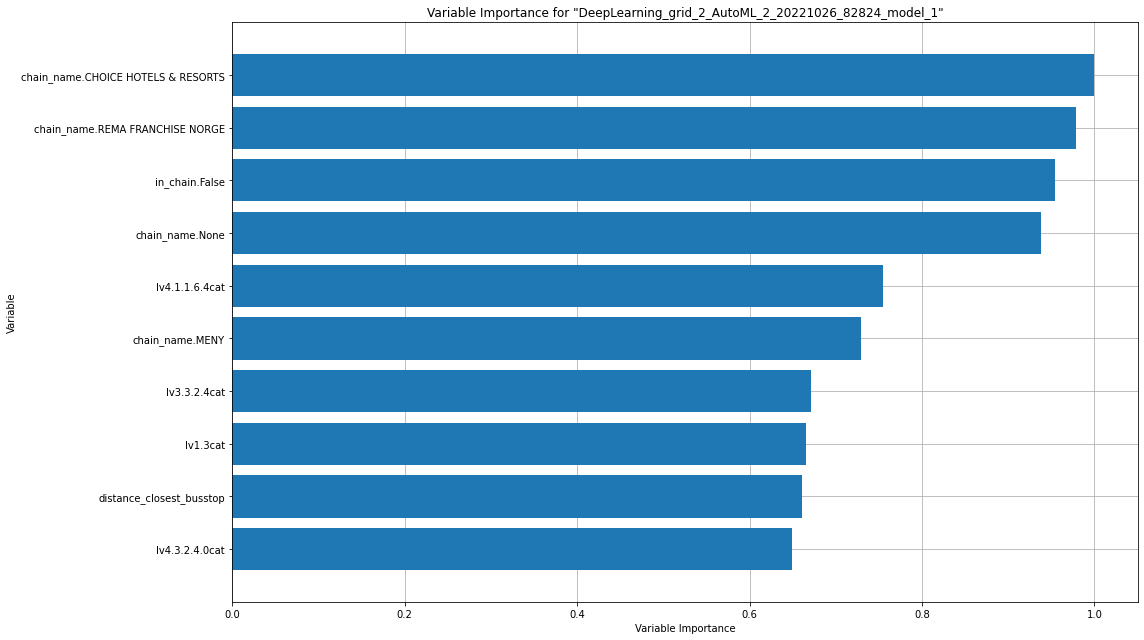

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

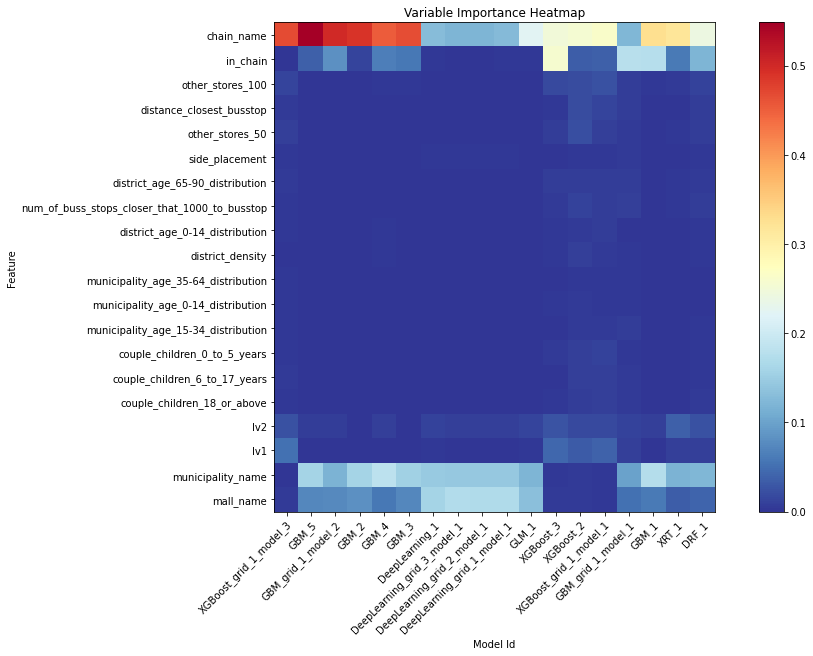

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

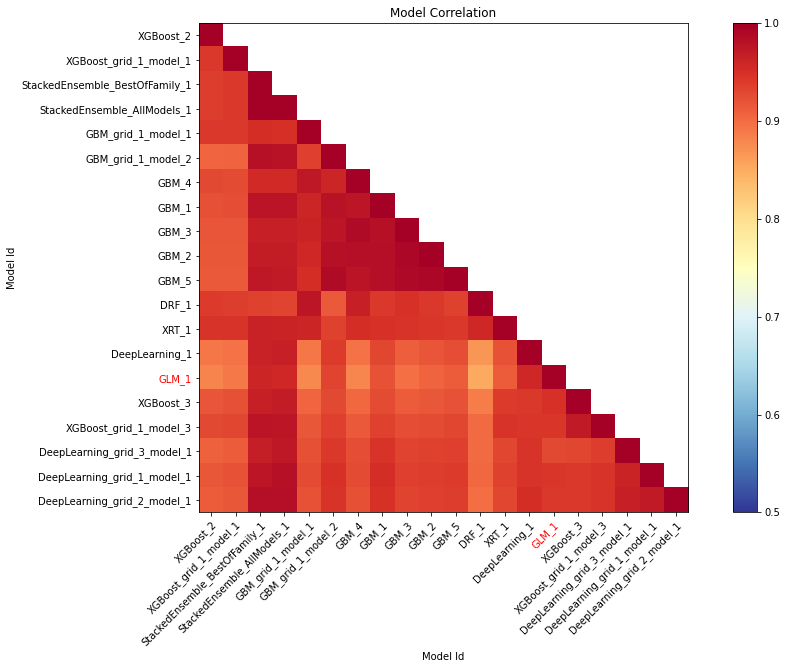

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

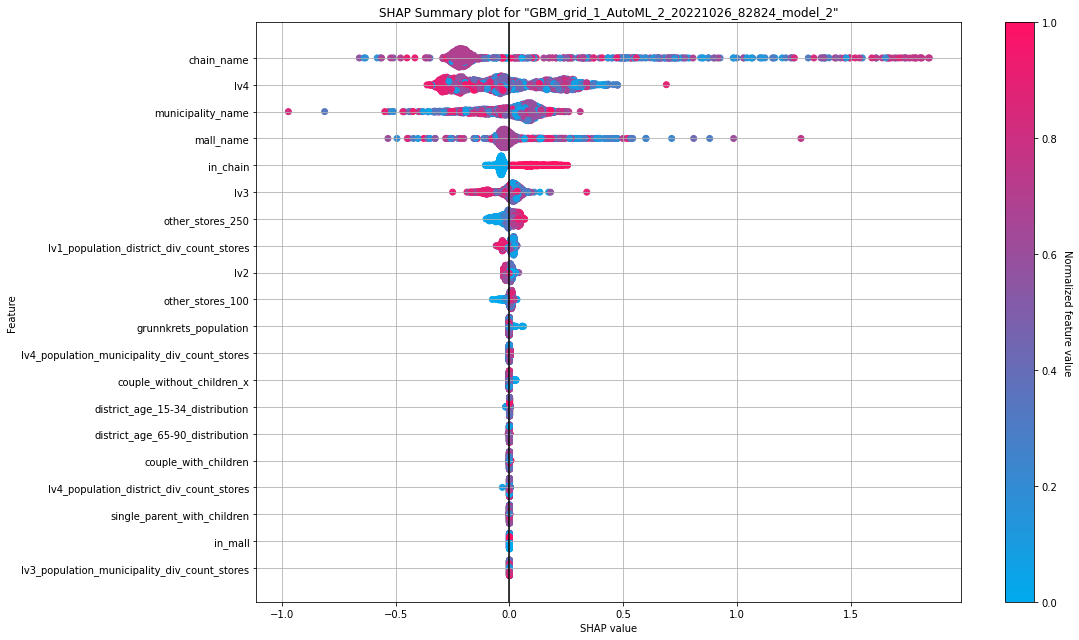

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

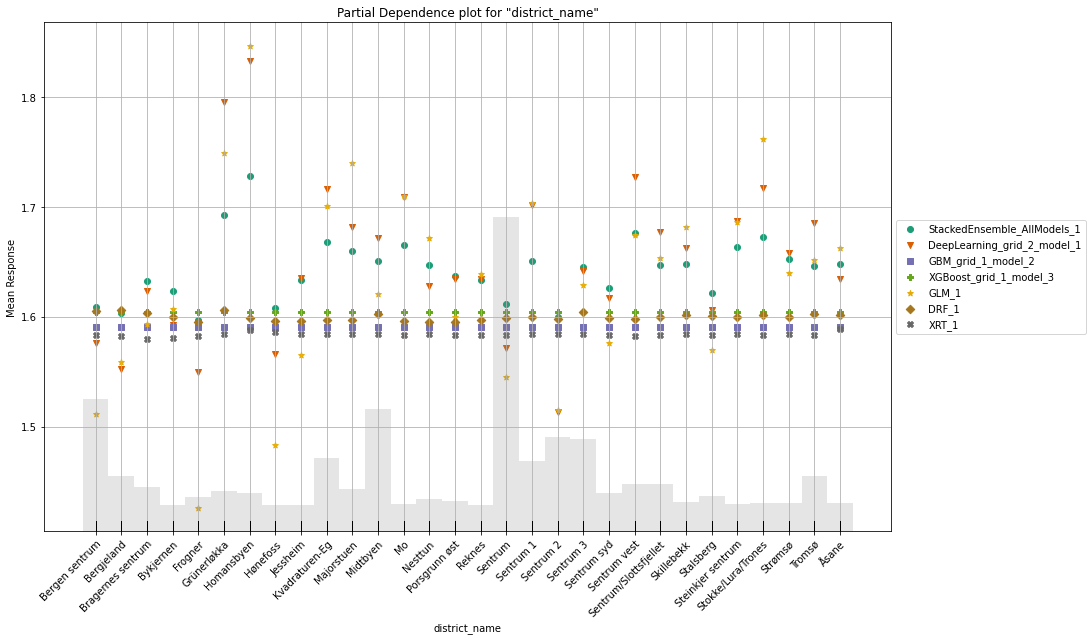

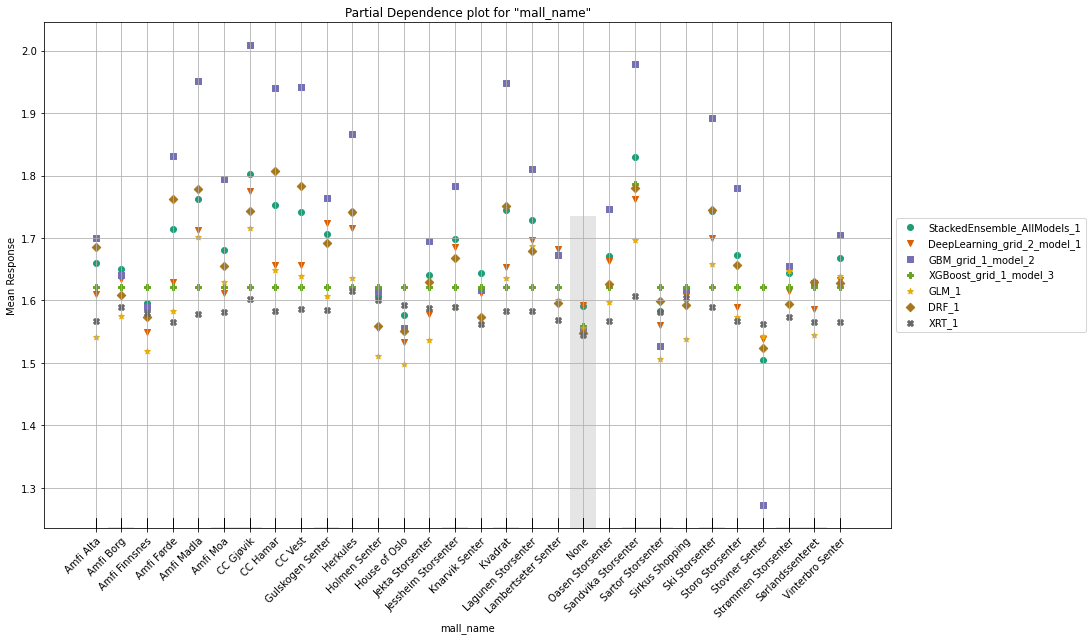

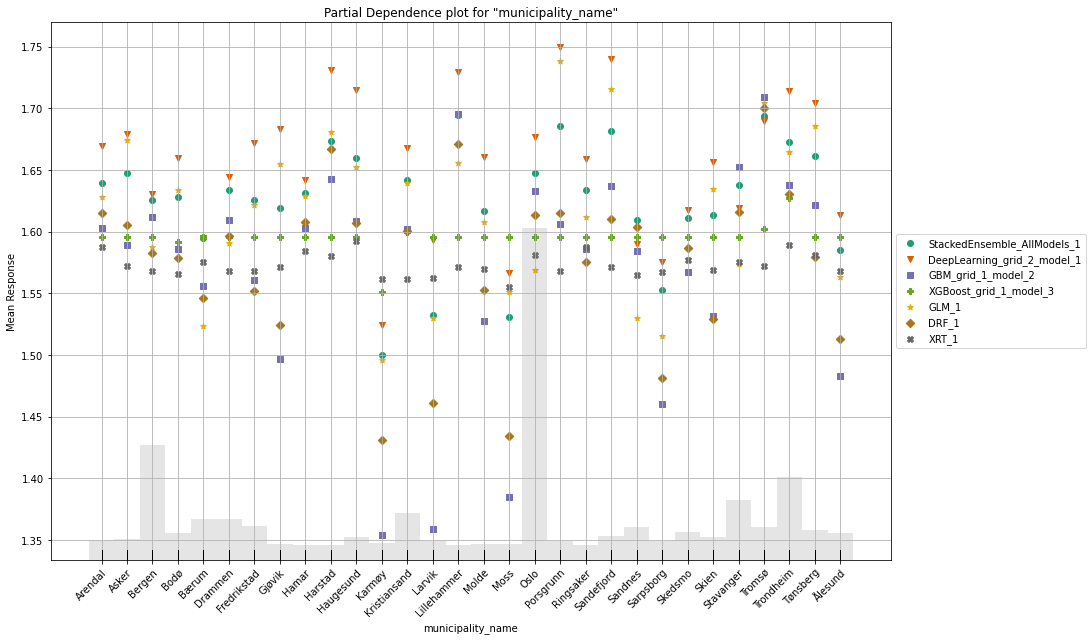

KeyboardInterrupt: ignored

<Figure size 1152x648 with 0 Axes>

In [37]:
aml.explain(hf)